In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 

import pickle as pkl
import math
import numpy as np
import tensorflow as tf
import cv2
import pandas as pd
from google.colab import drive
from keras.callbacks import LearningRateScheduler, TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow import keras
from keras import layers, regularizers, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, Callback, EarlyStopping, LambdaCallback
from keras.initializers import glorot_normal, RandomNormal, Zeros
from keras.models import Model, load_model, Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import ZeroPadding2D
from keras.layers import AveragePooling2D
from keras.layers import Activation
from keras.layers import Flatten, Add, Average
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import concatenate
from keras.layers import GaussianNoise
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
all_data = pd.read_csv("/content/drive/MyDrive/550FinalProject/CN_SampleData.csv")
all_data

,news,label
0,国家男篮孙悦深夜幽会富家女(组图)\n 荆楚网消息 (楚天金报) 去年国家男篮成绩骄人，“...,2
1,两市低开震荡 早盘终收红\n\n 本网讯(上海证券报 黄波)\n 12日早盘，沪深两市大...,13
2,前谷歌中国高管刘骏担任人民搜索首席科学家\n 人民网北京2月20日电 (记者 崔东) 近日...,12
3,加息预期渐近 外资行抢占利率互换市场\n “我们现在正和一些有中长期贷款的客户，或者负债率...,14
4,邓华德强硬回击质疑：电视解说员根本就不懂篮球！\n 本报安卡拉专电(记者潘天舒)中国队出线...,1
...,...,...
127595,明日股市三大猜想及应对策略\n 中财网\n 猜想一：\n 短线面临方向性选择？\n ...,13
127596,组图：柳敏最新个人写真集 泰国取景性感妩媚\n 新浪娱乐讯 北京时间2月5日下午消息，据...,2
127597,德国安联保险拟收购英吉利海峡隧道铁路\n 新浪财经讯 北京时间10月18日上午消息，据外电...,13
127598,高考生饮食别搞特殊 睡眠并不是越多越好\n 高考期间，考生和家长的紧张情绪会交融，家长会为...,6


## Test Data = 20%

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
X=all_data['news'].values
y=all_data['label'].values
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = {'Label': y_train,
        'News': X_train}
train_data = pd.DataFrame(train_data)
train_data

,Label,News
0,1,短讯-纽卡斯尔希勒接班再度破门 2场4进球领跑射手榜\n 新浪体育讯 英超第3轮战罢，纽卡...
1,12,百度搜索风云榜2010年度榜单明日出炉\n 新浪科技讯 1月6日上午消息，百度2010年度...
2,14,专家：PTA基本面将发生逆转\n 王磊燕\n 在前期走出一波强劲行情后，PTA(精对苯二...
3,6,专家提醒 五无考生不适合复读 \n “迈开复读的腿，就要坚定不移向前走。复读不是救赎，而是...
4,2,金巧巧获颁“孝星”证书 感恩谈“孝道”(图)\n 新浪娱乐讯 近日，“内地第一全能女艺人”...
...,...,...
102075,13,快讯：创业板指涨2.7% 雅本化学等6股涨停\n 新浪财经讯 创业板今日整体表现强于大盘，...
102076,11,父亲为给儿子治病劫持人续1名律师愿免费援助\n 《糊涂爸爸求款救子心切 冲动劫持红十字会人...
102077,12,视频网站除了“烧钱”还能怎么办\n ■ 一家之言\n 腾讯将于4月份推出视频服务，并有可...
102078,11,医生为晕厥女子做34次电击救回其性命\n 近日，寿光市人民医院收治一名38岁的女患者，该患...


In [7]:
test_data = {'Label': y_test,
        'News': X_test}
test_data = pd.DataFrame(test_data)
test_data

,Label,News
0,14,多家银行汇率挂钩产品翻船 广发产品收益为零\n 多家银行汇率挂钩产品“翻船”：光大错判汇率...
1,13,申银万国：A股八月或高位宽幅震荡\n 申银万国证券研究所 魏道科\n 盘中特征：\n ...
2,6,北化工招办主任：09年优势专业增加招生人数\n 2009年高考即将拉开大幕，高校招生有哪些...
3,12,三大运营商全部介入黑莓手机竞争\n 商报讯 (记者 吴辰光) 记者昨日从中国联通内部人士处...
4,5,一季度商品住宅月均成交量超07年高峰时水平\n 经历严冬的中国房地产市场，在春季呈现复...
...,...,...
25515,12,季卫东：中国媒体和互联网――2008年展望\n摩根士丹利季卫东\n 各位领导，各位朋友，各...
25516,1,中国90后胜日本冠军 羽根直树：日本棋手实力不够\n 本报记者张晓露乌镇报道\n 第十一...
25517,13,游资追捧超跌小盘个股\n 据大智慧数据显示，昨日两市大盘资金净流出4.02亿元。这主要体现...
25518,12,诺基亚第一季度净利润4.67亿美元\n 新浪科技讯 北京时间4月22日晚间消息，据国外媒体...


In [8]:
%%bash
pip install -q transformers

In [9]:
import sys
sys.version

'3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]'

In [10]:
!pip3 install fastai

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path 

import os

import torch
import torch.optim as optim

import random 

# fastai
from fastai import *
from fastai.text import *
from fastai.callbacks import *

# transformers
from transformers import PreTrainedModel, PreTrainedTokenizer, PretrainedConfig

from transformers import BertForSequenceClassification, BertTokenizer, BertConfig
from transformers import RobertaForSequenceClassification, RobertaTokenizer, RobertaConfig
from transformers import XLNetForSequenceClassification, XLNetTokenizer, XLNetConfig
from transformers import XLMForSequenceClassification, XLMTokenizer, XLMConfig
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, DistilBertConfig

In [12]:
import fastai
import transformers
print('fastai version :', fastai.__version__)
print('transformers version :', transformers.__version__)

fastai version : 1.0.61
transformers version : 4.14.1


In [13]:
MODEL_CLASSES = {
    'bert': (BertForSequenceClassification, BertTokenizer, BertConfig),
    'roberta': (RobertaForSequenceClassification, RobertaTokenizer, RobertaConfig),
}

In [14]:
# Parameters
seed = 42
use_fp16 = False
bs = 16

model_type = 'roberta'
pretrained_model_name = 'roberta-base'

# model_type = 'bert'
# pretrained_model_name='bert-base-uncased'


In [15]:
model_class, tokenizer_class, config_class = MODEL_CLASSES['roberta']
#model_class, tokenizer_class, config_class = MODEL_CLASSES['bert']
model_class

transformers.models.roberta.modeling_roberta.RobertaForSequenceClassification

In [16]:
def seed_all(seed_value):
    random.seed(seed_value) # Python
    np.random.seed(seed_value) # cpu vars
    torch.manual_seed(seed_value) # cpu  vars
    
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # gpu vars
        torch.backends.cudnn.deterministic = True  #needed
        torch.backends.cudnn.benchmark = False

In [17]:
seed_all(seed)

In [18]:
class TransformersBaseTokenizer(BaseTokenizer):
    """Wrapper around PreTrainedTokenizer to be compatible with fast.ai"""
    def __init__(self, pretrained_tokenizer: PreTrainedTokenizer, model_type = 'bert', **kwargs):
        self._pretrained_tokenizer = pretrained_tokenizer
        self.max_seq_len = pretrained_tokenizer.model_max_length
        self.model_type = model_type

    def __call__(self, *args, **kwargs): 
        return self

    def tokenizer(self, t:str) -> List[str]:
        """Limits the maximum sequence length and add the spesial tokens"""
        CLS = self._pretrained_tokenizer.cls_token
        SEP = self._pretrained_tokenizer.sep_token
        if self.model_type in ['roberta']:
            tokens = self._pretrained_tokenizer.tokenize(t, add_prefix_space=True)[:self.max_seq_len - 2]
            tokens = [CLS] + tokens + [SEP]
        else:
            tokens = self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2]
            if self.model_type in ['xlnet']:
                tokens = tokens + [SEP] +  [CLS]
            else:
                tokens = [CLS] + tokens + [SEP]
        return tokens

In [19]:
transformer_tokenizer = tokenizer_class.from_pretrained(pretrained_model_name)
transformer_base_tokenizer = TransformersBaseTokenizer(pretrained_tokenizer = transformer_tokenizer, model_type = model_type)
fastai_tokenizer = Tokenizer(tok_func = transformer_base_tokenizer, pre_rules=[], post_rules=[])

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [20]:
transformer_tokenizer.model_max_length

512

In [21]:
class TransformersVocab(Vocab):
    def __init__(self, tokenizer: PreTrainedTokenizer):
        super(TransformersVocab, self).__init__(itos = [])
        self.tokenizer = tokenizer
    
    def numericalize(self, t:Collection[str]) -> List[int]:
        "Convert a list of tokens `t` to their ids."
        return self.tokenizer.convert_tokens_to_ids(t)
        #return self.tokenizer.encode(t)

    def textify(self, nums:Collection[int], sep=' ') -> List[str]:
        "Convert a list of `nums` to their tokens."
        nums = np.array(nums).tolist()
        return sep.join(self.tokenizer.convert_ids_to_tokens(nums)) if sep is not None else self.tokenizer.convert_ids_to_tokens(nums)
    
    def __getstate__(self):
        return {'itos':self.itos, 'tokenizer':self.tokenizer}

    def __setstate__(self, state:dict):
        self.itos = state['itos']
        self.tokenizer = state['tokenizer']
        self.stoi = collections.defaultdict(int,{v:k for k,v in enumerate(self.itos)})

In [22]:
transformer_vocab =  TransformersVocab(tokenizer = transformer_tokenizer)
numericalize_processor = NumericalizeProcessor(vocab=transformer_vocab)

tokenize_processor = TokenizeProcessor(tokenizer=fastai_tokenizer, include_bos=False, include_eos=False)

transformer_processor = [tokenize_processor, numericalize_processor]

In [23]:
pad_first = bool(model_type in ['roberta'])
#pad_first = bool(model_type in ['bert'])
pad_idx = transformer_tokenizer.pad_token_id

In [24]:
tokens = transformer_tokenizer.tokenize('Salut c est moi, Hello it s me')
print(tokens)
ids = transformer_tokenizer.convert_tokens_to_ids(tokens)
print(ids)
transformer_tokenizer.convert_ids_to_tokens(ids)

['Sal', 'ut', 'Ġc', 'Ġest', 'Ġmo', 'i', ',', 'ĠHello', 'Ġit', 'Ġs', 'Ġme']
[18111, 1182, 740, 3304, 7458, 118, 6, 20920, 24, 579, 162]


['Sal', 'ut', 'Ġc', 'Ġest', 'Ġmo', 'i', ',', 'ĠHello', 'Ġit', 'Ġs', 'Ġme']

In [25]:
databunch = (TextList.from_df(train_data, cols='News', processor=transformer_processor)
             .split_by_rand_pct(0.1,seed=seed)
             .label_from_df(cols= 'Label')
             .add_test(test_data)
             .databunch(bs=bs, pad_first=pad_first, pad_idx=pad_idx))

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [26]:
print('[CLS] token :', transformer_tokenizer.cls_token)
print('[SEP] token :', transformer_tokenizer.sep_token)
print('[PAD] token :', transformer_tokenizer.pad_token)
databunch.show_batch()

[CLS] token : <s>
[SEP] token : </s>
[PAD] token : <pad>


text,target
<s> Ġæ Ĺ ł è § Ĩ ç Ń ī ç ¦ » åŃĲ Ġç ĥ Ń é Ķ Ģ IPS ç ¡ ¬ å ± ı æ ¶ ² æ Ļ ¶ çĶ µ è § Ĩ æ İ ¨ è į Ĳ Ċ ãĢ Ģ ãĢ Ģ ä½ľ èĢħ ï ¼ ļ ä¸Ń åħ ³ æĿ ĳ åľ ¨ ç º ¿ Ġå Ī ĺ è¿ ª Ċ,12
<s> ĠTV B é «ĺ ç ® ¡ åĨ į ç İ ° æĸ ° é Ŀ ¢ å ŃĶ Ġå § Ķ ä» » é Ļ Ī ç ¢ § é ĵ § æ İ Į ç ® ¡ åĽ ½ é Ļ ħ ä¸ ļ åĬ ¡ Ċ ãĢ Ģ ãĢ Ģ æĸ ° æµ ª è ´ ¢ ç » ı è ® ¯ Ġ2 æľ Ī,13
<s> Ġ5 å Ģ į åħī åŃ ¦ åı ĺ çĦ ¦ é ķ ľ å¤ ´ Ġå ¥ ¥ æ ŀ Ĺ å· ´ æĸ ¯ u 5 010 ä» ħ 13 77 åħ ĥ Ċ ãĢ Ģ ãĢ Ģ ä½ľ èĢħ ï ¼ ļ è ĳ £ å ĺ ī çĲ ª Ċ ãĢ Ģ ãĢ Ģ å ± ± è ¥ ¿ è¡ Į æĥ ħ Ġå,12
<s> Ġç ¾ İ è ı ± çĶ µ å Ļ ¨ ï ¼ ļ æ ¯ Ľ åĪ © å¤§ å¹ ħ ä¸ ĭ é Ļ į Ġè ´ ¹ çĶ ¨ æ İ § åĪ ¶ åĪ Ŀ è § ģ æĪ Ĳ æķ Ī Ċ ãĢ Ģ ãĢ Ģ æĸ ° æµ ª æ ı Ĳ ç ¤ º ï ¼ ļ æľ ¬ æĸ ĩ å,13
<s> Ġ ä¸Ń åĽ ½ æŃ¦ æľ ¯ æķ £ æī ĵ äº ī é ľ ¸ è µ Ľ åĨ ³ åĩ º åĽ Ľ å¼ º Ġé » Ħ å ģ ¥ ç ¿ Ķ è § £ è¯ ´ æ ¿ Ģ æĥ ħ åĽ Ľ å° Ħ Ċ ãĢ Ģ ãĢ Ģ æľ ¬ æ Ĭ ¥ è ® ¯ ï ¼ Ī è ® °,1


In [27]:
print('[CLS] id :', transformer_tokenizer.cls_token_id)
print('[SEP] id :', transformer_tokenizer.sep_token_id)
print('[PAD] id :', pad_idx)
test_one_batch = databunch.one_batch()[0]
print('Batch shape : ',test_one_batch.shape)
print(test_one_batch)

[CLS] id : 0
[SEP] id : 2
[PAD] id : 1
Batch shape :  torch.Size([16, 512])
tensor([[    0, 48283, 49637,  ...,  2023, 44574,     2],
        [    0, 47111,  2023,  ..., 23171, 37127,     2],
        [    0,   974,   612,  ..., 16948, 46499,     2],
        ...,
        [    0, 47111,  8384,  ..., 47658, 12736,     2],
        [    0, 48430,  2023,  ..., 12736, 46015,     2],
        [    0, 47416, 18400,  ..., 47504, 12736,     2]])


In [28]:
# defining our model architecture 
class CustomTransformerModel(nn.Module):
    def __init__(self, transformer_model: PreTrainedModel):
        super(CustomTransformerModel,self).__init__()
        self.transformer = transformer_model
        
    def forward(self, input_ids, attention_mask=None):
        
        # attention_mask
        # Mask to avoid performing attention on padding token indices.
        # Mask values selected in ``[0, 1]``:
        # ``1`` for tokens that are NOT MASKED, ``0`` for MASKED tokens.
        attention_mask = (input_ids!=pad_idx).type(input_ids.type()) 
        
        logits = self.transformer(input_ids,
                                  attention_mask = attention_mask)[0]   
        return logits

In [29]:
config = config_class.from_pretrained(pretrained_model_name)
config.num_labels = 14
config.use_bfloat16 = use_fp16
print(config)

RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_11": 11,
    "LABEL_12": 12,
    "LABEL_13": 13,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7,
    "LABEL_8": 8,
    "LABEL_9": 9
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_atten

In [30]:
transformer_model = model_class.from_pretrained(pretrained_model_name, config = config)

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

In [31]:
custom_transformer_model = CustomTransformerModel(transformer_model = transformer_model)

In [32]:
from fastai.callbacks import *
from transformers import AdamW
from functools import partial

CustomAdamW = partial(AdamW, correct_bias=False)

learner = Learner(databunch, 
                  custom_transformer_model, 
                  opt_func = CustomAdamW, 
                  metrics=[accuracy, error_rate])

# Show graph of learner stats and metrics after each epoch.
learner.callbacks.append(ShowGraph(learner))

# Put learn in FP16 precision mode. --> Seems to not working
if use_fp16: learner = learner.to_fp16()

In [33]:
print(learner.model)

CustomTransformerModel(
  (transformer): RobertaForSequenceClassification(
    (roberta): RobertaModel(
      (embeddings): RobertaEmbeddings(
        (word_embeddings): Embedding(50265, 768, padding_idx=1)
        (position_embeddings): Embedding(514, 768, padding_idx=1)
        (token_type_embeddings): Embedding(1, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): RobertaEncoder(
        (layer): ModuleList(
          (0): RobertaLayer(
            (attention): RobertaAttention(
              (self): RobertaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): RobertaSelfOutput(
                (d

In [34]:

# For roberta-base
list_layers = [learner.model.transformer.roberta.embeddings,
              learner.model.transformer.roberta.encoder.layer[0],
              learner.model.transformer.roberta.encoder.layer[1],
              learner.model.transformer.roberta.encoder.layer[2],
              learner.model.transformer.roberta.encoder.layer[3],
              learner.model.transformer.roberta.encoder.layer[4],
              learner.model.transformer.roberta.encoder.layer[5],
              learner.model.transformer.roberta.encoder.layer[6],
              learner.model.transformer.roberta.encoder.layer[7],
              learner.model.transformer.roberta.encoder.layer[8],
              learner.model.transformer.roberta.encoder.layer[9],
              learner.model.transformer.roberta.encoder.layer[10],
              learner.model.transformer.roberta.encoder.layer[11]]

# For bert-base
# list_layers = [learner.model.transformer.bert.embeddings,
#               learner.model.transformer.bert.encoder.layer[0],
#               learner.model.transformer.bert.encoder.layer[1],
#               learner.model.transformer.bert.encoder.layer[2],
#               learner.model.transformer.bert.encoder.layer[3],
#               learner.model.transformer.bert.encoder.layer[4],
#               learner.model.transformer.bert.encoder.layer[5],
#               learner.model.transformer.bert.encoder.layer[6],
#               learner.model.transformer.bert.encoder.layer[7],
#               learner.model.transformer.bert.encoder.layer[8],
#               learner.model.transformer.bert.encoder.layer[9],
#               learner.model.transformer.bert.encoder.layer[10],
#               learner.model.transformer.bert.encoder.layer[11],
#               learner.model.transformer.bert.pooler]

In [35]:
list_layers

[RobertaEmbeddings(
   (word_embeddings): Embedding(50265, 768, padding_idx=1)
   (position_embeddings): Embedding(514, 768, padding_idx=1)
   (token_type_embeddings): Embedding(1, 768)
   (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
   (dropout): Dropout(p=0.1, inplace=False)
 ), RobertaLayer(
   (attention): RobertaAttention(
     (self): RobertaSelfAttention(
       (query): Linear(in_features=768, out_features=768, bias=True)
       (key): Linear(in_features=768, out_features=768, bias=True)
       (value): Linear(in_features=768, out_features=768, bias=True)
       (dropout): Dropout(p=0.1, inplace=False)
     )
     (output): RobertaSelfOutput(
       (dense): Linear(in_features=768, out_features=768, bias=True)
       (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
       (dropout): Dropout(p=0.1, inplace=False)
     )
   )
   (intermediate): RobertaIntermediate(
     (dense): Linear(in_features=768, out_features=3072, bias=True)
   )
   

In [36]:
learner.split(list_layers)
num_groups = len(learner.layer_groups)
print('Learner split in',num_groups,'groups')
print(learner.layer_groups)

Learner split in 13 groups
[Sequential(
  (0): Embedding(50265, 768, padding_idx=1)
  (1): Embedding(514, 768, padding_idx=1)
  (2): Embedding(1, 768)
  (3): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (4): Dropout(p=0.1, inplace=False)
), Sequential(
  (0): Linear(in_features=768, out_features=768, bias=True)
  (1): Linear(in_features=768, out_features=768, bias=True)
  (2): Linear(in_features=768, out_features=768, bias=True)
  (3): Dropout(p=0.1, inplace=False)
  (4): Linear(in_features=768, out_features=768, bias=True)
  (5): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (6): Dropout(p=0.1, inplace=False)
  (7): Linear(in_features=768, out_features=3072, bias=True)
  (8): Linear(in_features=3072, out_features=768, bias=True)
  (9): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (10): Dropout(p=0.1, inplace=False)
), Sequential(
  (0): Linear(in_features=768, out_features=768, bias=True)
  (1): Linear(in_features=768, out_features=768, bias=True)
  (2)

In [37]:
learner.save('untrain')
seed_all(seed)
learner.load('untrain')

Learner(data=TextClasDataBunch;

Train: LabelList (91872 items)
x: TextList
<s> Ġç Ł Ń è ® ¯ - ç º ½ åį ¡ æĸ ¯ å° Ķ å¸ Į åĭ Ĵ æ İ ¥ ç ı Ń åĨ į åº ¦ ç ł ´ éĹ ¨ Ġ2 åľ º 4 è¿ Ľ çĲ ĥ é ¢ Ĩ è · ĳ å° Ħ æī ĭ æ ¦ ľ Ċ ãĢ Ģ ãĢ Ģ æĸ ° æµ ª ä½ ĵ è Ĥ ² è ® ¯ ãĢ Ģ è ĭ ± è ¶ħ ç ¬ ¬ 3 è ½ ® æĪ ĺ ç ½ ¢ ï ¼ Į ç º ½ åį ¡ æĸ ¯ å° Ķ å® ¢ åľ º ä» ¥ 1 æ ¯ Ķ 1 æĪ ĺ å¹ ³ äº Ĩ 1990 å¹ ´ ä» ¥ æĿ ¥ è¿ ĺ ä» İ æľ ª å® ¢ åľ º è µ ¢ è¿ ĩ çļĦ çĭ ¼ é ĺ Ł ãĢĤ åľ ¨ ä¸Ĭ ä¸Ģ è ½ ® è ģ Ķ è µ Ľ ä¸Ĭ æ ¼ Ķ äº Ĩ å¸ ½ åŃĲ æĪ ı æ³ ķ å¹ ¶ åħ ¥ éĢ ī æľ Ģ ä½ ³ é ĺ µ å® ¹ çļĦ å ĸ ľ é ¹ Ĭ ä¸Ń é Ķ ĭ åį ¡ ç ½ Ĺ å° Ķ æľ ¬ åľ º æ ¯ Ķ è µ Ľ åı Ī æľ ī è¿ Ľ çĲ ĥ ãĢĤ æ ¯ Ķ è µ Ľ è¿ Ľ è¡ Į åĪ ° 62 åĪ Ĩ é Ĵ Ł ï ¼ Į åį ¡ ç ½ Ĺ å° Ķ æ İ ¥ å· ´ é ¡ ¿ çļĦ ä» » æĦ ı çĲ ĥ ä¼ ł ä¸Ń ï ¼ Į åľ ¨ éĹ ¨ åī į 12 ç ł ģ åĩ º å¤ ´ æ § Į ç ł ´ éĹ ¨ ï ¼ Į èĢ Į è¿ Ļ ä¹ Ł æĺ¯ ä» ĸ è¿ ĳ 2 åľ º æ ¯ Ķ è µ Ľ æī ĵ åħ ¥ çļĦ ç ¬ ¬ 4 ç ² Ĵ åħ ¥ çĲ ĥ ãĢĤ è¿ Ļ ä½ į è ¢ « ç § ° ä¸ º é ĺ ¿ åħ ° å¸ Į åĭ Ĵ æ İ ¥ ç ı Ń äºº çļĦ é «ĺ æķ Ī å° Ħ æī ĭ çĽ ® åī į å· ² ç » ı ä¸ İ å¾ · ç 

In [38]:
learner.summary()

CustomTransformerModel
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [512, 768]           38,603,520 True      
______________________________________________________________________
Embedding            [512, 768]           394,752    True      
______________________________________________________________________
Embedding            [512, 768]           768        True      
______________________________________________________________________
LayerNorm            [512, 768]           1,536      True      
______________________________________________________________________
Dropout              [512, 768]           0          False     
______________________________________________________________________
Linear               [512, 768]           590,592    True      
______________________________________________________________________
Linear               [512, 768]           590,592    True      
_______________________________________

In [ ]:
learner.lr_find()

In [ ]:
learner.recorder.plot(skip_end=10,suggestion=True)

In [ ]:
learner.unfreeze()

In [ ]:
num_groups = len(learner.layer_groups)
num_groups

13

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.403500,0.375494,0.884013,0.115987,1:21:53
1,0.294301,0.300850,0.910071,0.089929,1:22:01


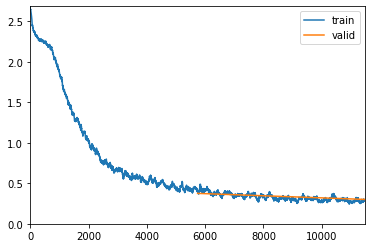

In [ ]:
lr = 1e-5
learner.fit_one_cycle(2, max_lr=slice(lr*0.95**num_groups, lr), moms=(0.8, 0.9))
